Sebastian Raschka, 2015-2022   
`mlxtend`, a library of extension and helper modules for Python's data analysis and machine learning libraries

- GitHub repository: https://github.com/rasbt/mlxtend
- Documentation: https://rasbt.github.io/mlxtend/

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p matplotlib,numpy,scipy,mlxtend

Author: Sebastian Raschka

Last updated: 2023-05-17

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 8.13.2

matplotlib: 3.7.1
numpy     : 1.24.3
scipy     : 1.10.1
mlxtend   : 0.23.0.dev0



In [2]:
%matplotlib inline

# SequentialFeatureSelector: The popular forward and backward feature selection approaches (including floating variants)

Implementation of *sequential feature algorithms* (SFAs) -- greedy search algorithms -- that have been developed as a suboptimal solution to the computationally often not feasible exhaustive search.

> from mlxtend.feature_selection import SequentialFeatureSelector

## Overview

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial *d*-dimensional feature space to a *k*-dimensional feature subspace where *k < d*. The motivation behind feature selection algorithms is to automatically select a subset of features most relevant to the problem. The goal of feature selection is two-fold: We want to improve the computational efficiency and reduce the model's generalization error by removing irrelevant features or noise. In addition, a wrapper approach such as sequential feature selection is advantageous if embedded feature selection -- for example, a regularization penalty like LASSO -- is not applicable.

In a nutshell, SFAs remove or add one feature at a time based on the classifier performance until a feature subset of the desired size *k* is reached. There are four different flavors of SFAs available via the `SequentialFeatureSelector`:

1. Sequential Forward Selection (SFS)
2. Sequential Backward Selection (SBS)
3. Sequential Forward Floating Selection (SFFS)
4. Sequential Backward Floating Selection (SBFS)

The ***floating*** variants, SFFS and SBFS, can be considered extensions to the simpler SFS and SBS algorithms. The floating algorithms have an additional exclusion or inclusion step to remove features once they were included (or excluded) so that a larger number of feature subset combinations can be sampled. It is important to emphasize that this step is conditional and only occurs if the resulting feature subset is assessed as "better" by the criterion function after the removal (or addition) of a particular feature. Furthermore, I added an optional check to skip the conditional exclusion steps if the algorithm gets stuck in cycles.  


---

How is this different from *Recursive Feature Elimination* (RFE)  -- e.g., as implemented in `sklearn.feature_selection.RFE`? RFE is computationally less complex using the feature weight coefficients (e.g., linear models) or feature importance (tree-based algorithms) to eliminate features recursively, whereas SFSs eliminate (or add) features based on a user-defined classifier/regression performance metric.

---

# Tutorial Videos

<iframe width="560" height="315" src="https://www.youtube.com/embed/0vCXcGJg5Bo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

<iframe width="560" height="315" src="https://www.youtube.com/embed/KYypVSwqqHI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Visual Illustration

A visual illustration of the sequential backward selection process is provided below, from the paper

- Joe Bemister-Buffington, Alex J. Wolf, Sebastian Raschka, and Leslie A. Kuhn (2020)
Machine Learning to Identify Flexibility Signatures of Class A GPCR Inhibition
Biomolecules 2020, 10, 454. https://www.mdpi.com/2218-273X/10/3/454#

![](SequentialFeatureSelector_files/sbs-gpcr2020.png)

# Algorithmic Details

### Sequential Forward Selection (SFS)


**Input:** $Y = \{y_1, y_2, ..., y_d\}$  

- The ***SFS*** algorithm takes the whole $d$-dimensional feature set as input.


**Output:** $X_k = \{x_j \; | \;j = 1, 2, ..., k; \; x_j \in Y\}$, where $k = (0, 1, 2, ..., d)$

- SFS returns a subset of features; the number of selected features $k$, where $k < d$, has to be specified *a priori*.

**Initialization:** $X_0 = \emptyset$, $k = 0$

- We initialize the algorithm with an empty set $\emptyset$ ("null set") so that $k = 0$ (where $k$ is the size of the subset).

**Step 1 (Inclusion):**  

  $x^+ = \text{ arg max } J(X_k + x), \text{ where }  x \in Y - X_k$  
  $X_{k+1} = X_k + x^+$  
  $k = k + 1$    
  *Go to Step 1* 

- in this step, we add an additional feature, $x^+$, to our feature subset $X_k$.
- $x^+$ is the feature that maximizes our criterion function, that is, the feature that is associated with the best classifier performance if it is added to $X_k$.
- We repeat this procedure until the termination criterion is satisfied.

**Termination:** $k = p$

- We add features from the feature subset $X_k$ until the feature subset of size $k$ contains the number of desired features $p$ that we specified *a priori*.

### Sequential Backward Selection (SBS)

**Input:** the set of all features, $Y = \{y_1, y_2, ..., y_d\}$  

- The SBS algorithm takes the whole feature set as input.

**Output:** $X_k = \{x_j \; | \;j = 1, 2, ..., k; \; x_j \in Y\}$, where $k = (0, 1, 2, ..., d)$

- SBS returns a subset of features; the number of selected features $k$, where $k < d$, has to be specified *a priori*.

**Initialization:** $X_0 = Y$, $k = d$

- We initialize the algorithm with the given feature set so that the $k = d$.


**Step 1 (Exclusion):**  

$x^- = \text{ arg max } J(X_k - x), \text{  where } x \in X_k$  
$X_{k-1} = X_k - x^-$  
$k = k - 1$  
*Go to Step 1*  

- In this step, we remove a feature, $x^-$ from our feature subset $X_k$.
- $x^-$ is the feature that maximizes our criterion function upon re,oval, that is, the feature that is associated with the best classifier performance if it is removed from $X_k$.
- We repeat this procedure until the termination criterion is satisfied.


**Termination:** $k = p$

- We add features from the feature subset $X_k$ until the feature subset of size $k$ contains the number of desired features $p$ that we specified *a priori*.



### Sequential Backward Floating Selection (SBFS)

**Input:** the set of all features, $Y = \{y_1, y_2, ..., y_d\}$  

- The SBFS algorithm takes the whole feature set as input.

**Output:** $X_k = \{x_j \; | \;j = 1, 2, ..., k; \; x_j \in Y\}$, where $k = (0, 1, 2, ..., d)$

- SBFS returns a subset of features; the number of selected features $k$, where $k < d$, has to be specified *a priori*.

**Initialization:** $X_0 = Y$, $k = d$

- We initialize the algorithm with the given feature set so that the $k = d$.

**Step 1 (Exclusion):**  

$x^- = \text{ arg max } J(X_k - x), \text{  where } x \in X_k$  
$X_{k-1} = X_k - x^-$  
$k = k - 1$  
*Go to Step 2*  

- In this step, we remove a feature, $x^-$ from our feature subset $X_k$.
- $x^-$ is the feature that maximizes our criterion function upon removal, that is, the feature that is associated with the best classifier performance if it is removed from $X_k$.


**Step 2 (Conditional Inclusion):**  
<br>
$x^+ = \text{ arg max } J(X_k + x), \text{ where } x \in Y - X_k$  
*if J(X_k + x) > J(X_k)*:    
&nbsp;&nbsp;&nbsp;&nbsp; $X_{k+1} = X_k + x^+$  
&nbsp;&nbsp;&nbsp;&nbsp; $k = k + 1$  
*Go to Step 1*  

- In Step 2, we search for features that improve the classifier performance if they are added back to the feature subset. If such features exist, we add the feature $x^+$ for which the performance improvement is maximized. If $k = 2$ or an improvement cannot be made (i.e., such feature $x^+$ cannot be found), go back to step 1; else, repeat this step.


**Termination:** $k = p$

- We add features from the feature subset $X_k$ until the feature subset of size $k$ contains the number of desired features $p$ that we specified *a priori*.


### Sequential Forward Floating Selection (SFFS)

**Input:** the set of all features, $Y = \{y_1, y_2, ..., y_d\}$  

- The ***SFFS*** algorithm takes the whole feature set as input, if our feature space consists of, e.g. 10, if our feature space consists of 10 dimensions (***d = 10***).
<br><br>

**Output:** a subset of features, $X_k = \{x_j \; | \;j = 1, 2, ..., k; \; x_j \in Y\}$, where $k = (0, 1, 2, ..., d)$

- The returned output of the algorithm is a subset of the feature space of a specified size. E.g., a subset of 5 features from a 10-dimensional feature space (***k = 5, d = 10***).
<br><br>

**Initialization:** $X_0 = \emptyset$, $k = 0$

- We initialize the algorithm with an empty set ("null set") so that the ***k = 0*** (where ***k*** is the size of the subset)
<br><br>

**Step 1 (Inclusion):**  
<br>
&nbsp;&nbsp;&nbsp;&nbsp; $x^+ = \text{ arg max } J(X_k + x), \text{ where }  x \in Y - X_k$  
&nbsp;&nbsp;&nbsp;&nbsp; $X_{k+1} = X_k + x^+$  
&nbsp;&nbsp;&nbsp;&nbsp; $k = k + 1$    
&nbsp;&nbsp;&nbsp;&nbsp;*Go to Step 2*  
<br> <br>
**Step 2 (Conditional Exclusion):**  
<br>
&nbsp;&nbsp;&nbsp;&nbsp; $x^- = \text{ arg max } J(X_k - x), \text{ where } x \in X_k$  
&nbsp;&nbsp;&nbsp;&nbsp;$if \; J(X_k - x) > J(X_k)$:    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $X_{k-1} = X_k - x^- $  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k = k - 1$    
&nbsp;&nbsp;&nbsp;&nbsp;*Go to Step 1*  

- In step 1, we include the feature from the ***feature space*** that leads to the best performance increase for our ***feature subset*** (assessed by the ***criterion function***). Then, we go over to step 2
- In step 2, we only remove a feature if the resulting subset would gain an increase in performance. If $k = 2$ or an improvement cannot be made (i.e., such feature $x^+$ cannot be found), go back to step 1; else, repeat this step.


- Steps 1 and 2 are repeated until the **Termination** criterion is reached.
<br><br>

**Termination:** stop when ***k*** equals the number of desired features


### References

- Ferri, F. J., Pudil P., Hatef, M., Kittler, J. (1994). [*"Comparative study of techniques for large-scale feature selection."*](https://books.google.com/books?hl=en&lr=&id=sbajBQAAQBAJ&oi=fnd&pg=PA403&dq=comparative+study+of+techniques+for+large+scale&ots=KdIOYpA8wj&sig=hdOsBP1HX4hcDjx4RLg_chheojc#v=onepage&q=comparative%20study%20of%20techniques%20for%20large%20scale&f=false) Pattern Recognition in Practice IV : 403-413.

- Pudil, P., Novovičová, J., & Kittler, J. (1994). [*"Floating search methods in feature selection."*](https://www.sciencedirect.com/science/article/pii/0167865594901279) Pattern recognition letters 15.11 (1994): 1119-1125.

## Example 1 - A simple Sequential Forward Selection example

Initializing a simple classifier from scikit-learn:

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=4)

We start by selection the "best" 3 features from the Iris dataset via Sequential Forward Selection (SFS). Here, we set `forward=True` and `floating=False`. By choosing `cv=0`, we don't perform any cross-validation, therefore, the performance (here: `'accuracy'`) is computed entirely on the training set. 

In [4]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2023-05-17 08:36:17] Features: 1/3 -- score: 0.96[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2023-05-17 08:36:17] Features: 2/3 -- score: 0.9733333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2023-05-17 08:36:17] Features: 3/3 -- score: 0.9733333333333334

Via the `subsets_` attribute, we can take a look at the selected feature indices at each step:

In [5]:
sfs1.subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([0.96]),
  'avg_score': 0.96,
  'feature_names': ('3',)},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('2', '3')},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('1', '2', '3')}}

In [6]:
sfs1 = sfs1.fit(X, y)
sfs1.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2023-05-17 08:36:17] Features: 1/3 -- score: 0.96[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2023-05-17 08:36:17] Features: 2/3 -- score: 0.9733333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2023-05-17 08:36:17] Features: 3/3 -- score: 0.9733333333333334

{1: {'feature_idx': (3,),
  'cv_scores': array([0.96]),
  'avg_score': 0.96,
  'feature_names': ('3',)},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('2', '3')},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('1', '2', '3')}}

Furthermore, we can access the indices of the 3 best features directly via the `k_feature_idx_` attribute:

In [7]:
sfs1.k_feature_idx_

(1, 2, 3)

Finally, the prediction score for these 3 features can be accesses via `k_score_`:

In [8]:
sfs1.k_score_

0.9733333333333334

**Feature Names**

When working with large datasets, the feature indices might be hard to interpret. In this case, we recommend using pandas DataFrames with distinct column names as input:

In [9]:
import pandas as pd

df_X = pd.DataFrame(X, columns=["Sepal length", "Sepal width", "Petal length", "Petal width"])
df_X.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
sfs1 = sfs1.fit(df_X, y)

print('Best accuracy score: %.2f' % sfs1.k_score_)
print('Best subset (indices):', sfs1.k_feature_idx_)
print('Best subset (corresponding names):', sfs1.k_feature_names_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best accuracy score: 0.97
Best subset (indices): (1, 2, 3)
Best subset (corresponding names): ('Sepal width', 'Petal length', 'Petal width')


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2023-05-17 08:36:17] Features: 1/3 -- score: 0.96[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2023-05-17 08:36:17] Features: 2/3 -- score: 0.9733333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2023-05-17 08:36:17] Features: 3/3 -- score: 0.9733333333333334

## Example 2 - Toggling between SFS, SBS, SFFS, and SBFS

Using the `forward` and `floating` parameters, we can toggle between SFS, SBS, SFFS, and SBFS as shown below. Note that we are performing (stratified) 4-fold cross-validation for more robust estimates in contrast to Example 1. Via `n_jobs=-1`, we choose to run the cross-validation on all our available CPU cores.

In [11]:
# Sequential Forward Selection
sfs = SFS(knn, 
          k_features=3, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sfs = sfs.fit(X, y)

print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)

###################################################

# Sequential Backward Selection
sbs = SFS(knn, 
          k_features=3, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sbs = sbs.fit(X, y)

print('\nSequential Backward Selection (k=3):')
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)

###################################################

# Sequential Forward Floating Selection
sffs = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sffs = sffs.fit(X, y)

print('\nSequential Forward Floating Selection (k=3):')
print(sffs.k_feature_idx_)
print('CV Score:')
print(sffs.k_score_)

###################################################

# Sequential Backward Floating Selection
sbfs = SFS(knn, 
           k_features=3, 
           forward=False, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sbfs = sbfs.fit(X, y)

print('\nSequential Backward Floating Selection (k=3):')
print(sbfs.k_feature_idx_)
print('CV Score:')
print(sbfs.k_score_)


Sequential Forward Selection (k=3):
(1, 2, 3)
CV Score:
0.9731507823613088

Sequential Backward Selection (k=3):
(1, 2, 3)
CV Score:
0.9731507823613088

Sequential Forward Floating Selection (k=3):
(1, 2, 3)
CV Score:
0.9731507823613088

Sequential Backward Floating Selection (k=3):
(1, 2, 3)
CV Score:
0.9731507823613088


In this simple scenario, selecting the best 3 features out of the 4 available features in the Iris set, we end up with similar results regardless of which sequential selection algorithms we used.

## Example 3 - Visualizing the results in DataFrames

 For our convenience, we can visualize the output from the feature selection in a pandas DataFrame format using the `get_metric_dict` method of the SequentialFeatureSelector object. The columns `std_dev` and `std_err` represent the standard deviation and standard errors of the cross-validation scores, respectively.

Below, we see the DataFrame of the Sequential Forward Selector from Example 2:

In [12]:
import pandas as pd
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.9736842105263158, 0.9473684210526315, 0.918...",0.959993,"(3,)",0.048319,0.030143,0.017403
2,"(2, 3)","[0.9736842105263158, 0.9473684210526315, 0.918...",0.959993,"(2, 3)",0.048319,0.030143,0.017403
3,"(1, 2, 3)","[0.9736842105263158, 1.0, 0.9459459459459459, ...",0.973151,"(1, 2, 3)",0.030639,0.019113,0.011035


Now, let's compare it to the Sequential Backward Selector:

In [13]:
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)","[0.9736842105263158, 0.9473684210526315, 0.918...",0.953236,"(0, 1, 2, 3)",0.03602,0.022471,0.012974
3,"(1, 2, 3)","[0.9736842105263158, 1.0, 0.9459459459459459, ...",0.973151,"(1, 2, 3)",0.030639,0.019113,0.011035


We can see that both SFS and SBFS found the same "best" 3 features, however, the intermediate steps where obviously different.

The `ci_bound` column in the DataFrames above represents the confidence interval around the computed cross-validation scores. By default, a confidence interval of 95% is used, but we can use different confidence bounds via the `confidence_interval` parameter. E.g., the confidence bounds for a 90% confidence interval can be obtained as follows:

In [14]:
pd.DataFrame.from_dict(sbs.get_metric_dict(confidence_interval=0.90)).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)","[0.9736842105263158, 0.9473684210526315, 0.918...",0.953236,"(0, 1, 2, 3)",0.027658,0.022471,0.012974
3,"(1, 2, 3)","[0.9736842105263158, 1.0, 0.9459459459459459, ...",0.973151,"(1, 2, 3)",0.023525,0.019113,0.011035


## Example 4 - Plotting the results

After importing the little helper function [`plotting.plot_sequential_feature_selection`](../plotting/plot_sequential_feature_selection.md), we can also visualize the results using matplotlib figures.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2023-05-17 08:36:18] Features: 1/4 -- score: 0.96[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2023-05-17 08:36:18] Features: 2/4 -- score: 0.9666666666666668[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2023-05-17 08:36:18] Features: 3/4 -- score: 0.9533333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | e

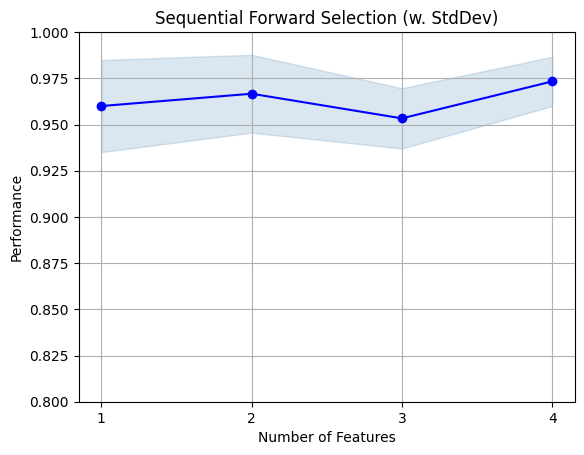

In [15]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

sfs = SFS(knn, 
          k_features=4, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=5)

sfs = sfs.fit(X, y)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

## Example 5 - Sequential Feature Selection for Regression

Similar to the classification examples above, the `SequentialFeatureSelector` also supports scikit-learn's estimators
for regression.

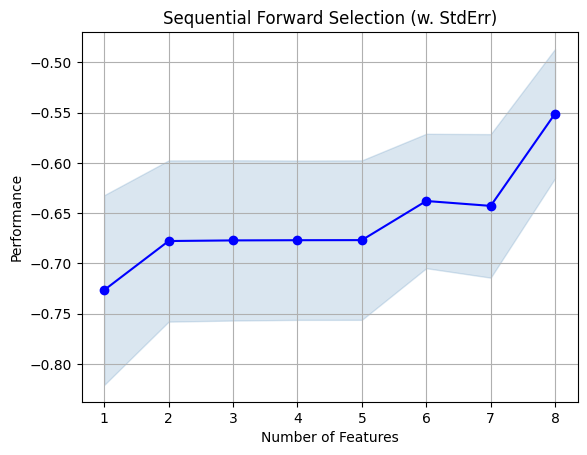

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X, y = data.data, data.target

lr = LinearRegression()

sfs = SFS(lr, 
          k_features=8, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

## Example 6 -- Feature Selection with Fixed Train/Validation Splits

If you do not wish to use cross-validation (here: k-fold cross-validation, i.e., rotating training and validation folds), you can use the `PredefinedHoldoutSplit` class to specify your own, fixed training and validation split.

In [17]:
from sklearn.datasets import load_iris
from mlxtend.evaluate import PredefinedHoldoutSplit
import numpy as np


iris = load_iris()
X = iris.data
y = iris.target

rng = np.random.RandomState(123)
my_validation_indices = rng.permutation(np.arange(150))[:30]
print(my_validation_indices)

[ 72 112 132  88  37 138  87  42   8  90 141  33  59 116 135 104  36  13
  63  45  28 133  24 127  46  20  31 121 117   4]


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS



knn = KNeighborsClassifier(n_neighbors=4)
piter = PredefinedHoldoutSplit(my_validation_indices)

sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=piter)

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2023-05-17 08:36:19] Features: 1/3 -- score: 0.9666666666666667[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2023-05-17 08:36:19] Features: 2/3 -- score: 0.9666666666666667[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2023-05-17 08:36:19] Features: 3/3 -- score: 0.9666666666666667

## Example 7 -- Using the Selected Feature Subset For Making New Predictions

In [19]:
# Initialize the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.33, random_state=1)

knn = KNeighborsClassifier(n_neighbors=4)

In [20]:
# Select the "best" three features via
# 5-fold cross-validation on the training set.

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)
sfs1 = sfs1.fit(X_train, y_train)

In [21]:
print('Selected features:', sfs1.k_feature_idx_)

Selected features: (1, 2, 3)


In [22]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]

X_train_sfs = sfs1.transform(X_train)
X_test_sfs = sfs1.transform(X_test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
knn.fit(X_train_sfs, y_train)
y_pred = knn.predict(X_test_sfs)

# Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

Test set accuracy: 96.00 %


## Example 8 -- Sequential Feature Selection and GridSearch

In the following example, we are tuning the SFS's estimator using GridSearch. To avoid unwanted behavior or side-effects, it's recommended to use the estimator inside and outside of SFS as separate instances.

In [23]:
# Initialize the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.2, random_state=123)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import mlxtend

knn1 = KNeighborsClassifier()
knn2 = KNeighborsClassifier()

sfs1 = SFS(estimator=knn1, 
           k_features=3,
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

pipe = Pipeline([('sfs', sfs1), 
                 ('knn2', knn2)])

param_grid = {
    'sfs__k_features': [1, 2, 3],
    'sfs__estimator__n_neighbors': [3, 4, 7], # inner knn
    'knn2__n_neighbors': [3, 4, 7] # outer knn
  }
    
gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  n_jobs=1, 
                  cv=5,
                  refit=False)

# run gridearch
gs = gs.fit(X_train, y_train)

Let's take a look at the suggested hyperparameters below:

for i in range(len(gs.cv_results_['params'])):
    print(gs.cv_results_['params'][i], 'test acc.:', gs.cv_results_['mean_test_score'][i])

The "best" parameters determined by GridSearch are ...

In [25]:
print("Best parameters via GridSearch", gs.best_params_)

Best parameters via GridSearch {'knn2__n_neighbors': 7, 'sfs__estimator__n_neighbors': 3, 'sfs__k_features': 3}


In [26]:
pipe.set_params(**gs.best_params_).fit(X_train, y_train)

Pipeline(steps=[('sfs',
                 SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                                           k_features=(3, 3),
                                           scoring='accuracy')),
                ('knn2', KNeighborsClassifier(n_neighbors=7))])

## Example 9 -- Selecting the "best"  feature combination in a k-range

If `k_features` is set to to a tuple `(min_k, max_k)` (new in 0.4.2), the SFS will now select the best feature combination that it discovered by iterating from `k=1` to `max_k` (forward), or `max_k` to `min_k` (backward). The size of the returned feature subset is then within `max_k` to `min_k`, depending on which combination scored best during cross validation.



In [27]:
X.shape

(150, 4)

best combination (ACC: 0.992): (0, 1, 2, 3, 6, 8, 9, 10, 11, 12)

all subsets:
 {1: {'feature_idx': (6,), 'cv_scores': array([0.84 , 0.64 , 0.84 , 0.8  , 0.875]), 'avg_score': 0.799, 'feature_names': ('6',)}, 2: {'feature_idx': (6, 9), 'cv_scores': array([0.92      , 0.88      , 1.        , 0.96      , 0.91666667]), 'avg_score': 0.9353333333333333, 'feature_names': ('6', '9')}, 3: {'feature_idx': (6, 9, 12), 'cv_scores': array([0.92      , 0.92      , 0.96      , 1.        , 0.95833333]), 'avg_score': 0.9516666666666665, 'feature_names': ('6', '9', '12')}, 4: {'feature_idx': (3, 6, 9, 12), 'cv_scores': array([0.96      , 0.96      , 0.96      , 1.        , 0.95833333]), 'avg_score': 0.9676666666666666, 'feature_names': ('3', '6', '9', '12')}, 5: {'feature_idx': (3, 6, 9, 10, 12), 'cv_scores': array([0.92, 0.96, 1.  , 1.  , 1.  ]), 'avg_score': 0.976, 'feature_names': ('3', '6', '9', '10', '12')}, 6: {'feature_idx': (2, 3, 6, 9, 10, 12), 'cv_scores': array([0.92, 0.96, 1.  , 0.96, 1.  ]

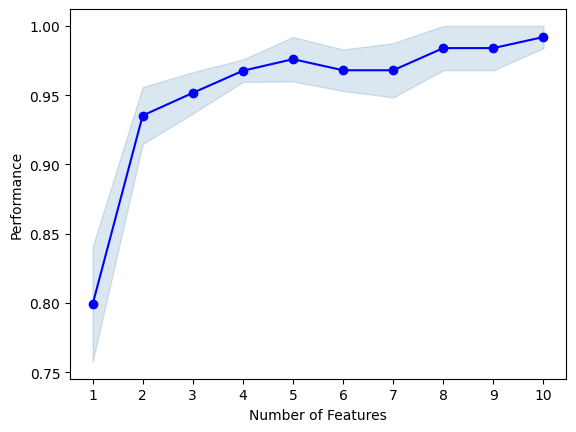

In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.data import wine_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X, y = wine_data()
X_train, X_test, y_train, y_test= train_test_split(X, y, 
                                                   stratify=y,
                                                   test_size=0.3,
                                                   random_state=1)

knn = KNeighborsClassifier(n_neighbors=2)

sfs1 = SFS(estimator=knn, 
           k_features=(3, 10),
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

pipe = make_pipeline(StandardScaler(), sfs1)

pipe.fit(X_train, y_train)

print('best combination (ACC: %.3f): %s\n' % (sfs1.k_score_, sfs1.k_feature_idx_))
print('all subsets:\n', sfs1.subsets_)
plot_sfs(sfs1.get_metric_dict(), kind='std_err');

## Example 10 -- Using other cross-validation schemes

In addition to standard k-fold and stratified k-fold, other cross validation schemes can be used with `SequentialFeatureSelector`. For example, `GroupKFold` or `LeaveOneOut` cross-validation from scikit-learn. 

#### Using GroupKFold with SequentialFeatureSelector

In [29]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.data import iris_data
from sklearn.model_selection import GroupKFold
import numpy as np

X, y = iris_data()
groups = np.arange(len(y)) // 10
print('groups: {}'.format(groups))

groups: [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14]


Calling the `split()` method of a scikit-learn cross-validator object will return a generator that yields train, test splits.

In [30]:
cv_gen = GroupKFold(4).split(X, y, groups)
cv_gen

<generator object _BaseKFold.split at 0x17c109580>

The `cv` parameter of `SequentialFeatureSelector` must be either an `int` or an iterable yielding train, test splits. This iterable can be constructed by passing the train, test split generator to the built-in `list()` function. 

In [31]:
cv = list(cv_gen)

In [32]:
knn = KNeighborsClassifier(n_neighbors=2)
sfs = SFS(estimator=knn, 
          k_features=2,
          scoring='accuracy',
          cv=cv)

sfs.fit(X, y)

print('best combination (ACC: %.3f): %s\n' % (sfs.k_score_, sfs.k_feature_idx_))

best combination (ACC: 0.940): (2, 3)



## Example 11 - Interrupting Long Runs for Intermediate Results

If your run is taking too long, it is possible to trigger a `KeyboardInterrupt` (e.g., ctrl+c on a Mac, or interrupting the cell in a Jupyter notebook) to obtain temporary results.

**Toy dataset**

In [33]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X, y = make_classification(
    n_samples=20000,
    n_features=500,
    n_informative=10,
    n_redundant=40,
    n_repeated=25,
    n_clusters_per_class=5,
    flip_y=0.05,
    class_sep=0.5,
    random_state=123,
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

**Long run with interruption**

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

sfs1 = SFS(model, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)

sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.3s finished

[2023-05-17 08:36:32] Features: 1/10 -- score: 0.5965[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 499 out of 499 | elapsed:   13.8s finished

[2023-05-17 08:36:45] Features: 2/10 -- score: 0.6256875000000001[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 498 out of 498 | elapsed:   18.1s finished

[2023-05-17 08:37:03] Features: 3/10 -- score: 0.642[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 

**Finalizing the fit**

Note that the feature selection run hasn't finished, so certain attributes may not be available. In order to use the SFS instance, it is recommended to call `finalize_fit`, which will make SFS estimator appear as "fitted" process the temporary results:

In [35]:
sfs1.finalize_fit()

In [36]:
print(sfs1.k_feature_idx_)
print(sfs1.k_score_)

(30, 128, 144, 160, 184, 229, 256, 356, 439, 458)
0.6554374999999999


## Example 12 - Using Pandas DataFrames

Optionally, we can also use pandas DataFrames and pandas Series as input to the `fit` function. In this case, the column names of the pandas DataFrame will be used as feature names. However, note that if `custom_feature_names` are provided in the fit function, these `custom_feature_names` take precedence over the DataFrame column-based feature names.

In [37]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


iris = load_iris()
X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=4)

sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=0)

In [38]:
X_df = pd.DataFrame(X, columns=['sepal len', 'petal len',
                                'sepal width', 'petal width'])
X_df.head()

,sepal len,petal len,sepal width,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Also, the target array, `y`, can be optionally be cast as a Series:

In [39]:
y_series = pd.Series(y)
y_series.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [40]:
sfs1 = sfs1.fit(X_df, y_series)

Note that the only difference of passing a pandas DataFrame as input is that the sfs1.subsets_ array will now contain a new column, 

In [41]:
sfs1.subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([0.96]),
  'avg_score': 0.96,
  'feature_names': ('petal width',)},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('sepal width', 'petal width')},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('petal len', 'sepal width', 'petal width')}}

In mlxtend version >= 0.13 pandas DataFrames are supported as feature inputs to the `SequentianFeatureSelector` instead of NumPy arrays or other NumPy-like array types.

## Example 13 - Specifying Fixed Feature Sets

Often, it may be useful to specify a fixed set of features we want to use for a given model (e.g., determined by prior knowledge or domain knowledge). Since MLxtend v 0.18.0, it is now possible to specify such features via the `fixed_features` attribute. This will mean that these features are guaranteed to be included in the selected subsets.

Note that this feature works for all options regarding forward and backward selection, and using floating selection or not.

The example below illustrates how we can set the features 0 and 2 in the dataset as fixed:

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=3)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(knn, 
           k_features=4, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           fixed_features=(0, 2),
           cv=3)

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2023-05-17 08:39:57] Features: 3/4 -- score: 0.9733333333333333[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2023-05-17 08:39:57] Features: 4/4 -- score: 0.9733333333333333

In [43]:
sfs1.subsets_

{2: {'feature_idx': (0, 2),
  'cv_scores': array([0.98, 0.92, 0.94]),
  'avg_score': 0.9466666666666667,
  'feature_names': ('0', '2')},
 3: {'feature_idx': (0, 2, 3),
  'cv_scores': array([0.98, 0.96, 0.98]),
  'avg_score': 0.9733333333333333,
  'feature_names': ('0', '2', '3')},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([0.98, 0.96, 0.98]),
  'avg_score': 0.9733333333333333,
  'feature_names': ('0', '1', '2', '3')}}

If the input dataset is a pandas DataFrame, we can also use the column names directly:

In [44]:
import pandas as pd

In [45]:
X_df = pd.DataFrame(X, columns=['sepal len', 'petal len',
                                'sepal width', 'petal width'])
X_df.head()

,sepal len,petal len,sepal width,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
sfs2 = SFS(knn, 
           k_features=4, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           fixed_features=('sepal len', 'petal len'),
           cv=3)

sfs2 = sfs2.fit(X_df, y_series)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2023-05-17 08:39:57] Features: 3/4 -- score: 0.9466666666666667[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2023-05-17 08:39:57] Features: 4/4 -- score: 0.9733333333333333

In [47]:
sfs2.subsets_

{2: {'feature_idx': (0, 1),
  'cv_scores': array([0.72, 0.74, 0.78]),
  'avg_score': 0.7466666666666667,
  'feature_names': ('sepal len', 'petal len')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.98, 0.92, 0.94]),
  'avg_score': 0.9466666666666667,
  'feature_names': ('sepal len', 'petal len', 'sepal width')},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([0.98, 0.96, 0.98]),
  'avg_score': 0.9733333333333333,
  'feature_names': ('sepal len', 'petal len', 'sepal width', 'petal width')}}

## Example 13 - Working with Feature Groups

Since mlxtend v0.21.0, it is possible to specify feature groups. Feature groups allow you to group certain features together, such that they are always selected as a group. This can be very useful in contexts similar to one-hot encoding -- if you want to treat the one-hot encoded feature as a single feature:

![](SequentialFeatureSelector_files/feature_groups.jpeg)

In the following example, we specify sepal length and sepal width as a feature group so that they are always selected together:

In [48]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target

X_df = pd.DataFrame(X, columns=['sepal len', 'petal len',
                                'sepal wid', 'petal wid'])
X_df.head()


,sepal len,petal len,sepal wid,petal wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

knn = KNeighborsClassifier(n_neighbors=3)

sfs1 = SFS(knn, 
           k_features=2, 
           scoring='accuracy',
           feature_groups=(['sepal len', 'sepal wid'], ['petal len'], ['petal wid']),
           cv=3)

sfs1 = sfs1.fit(X_df, y)

sfs1 = SFS(knn, 
           k_features=2, 
           scoring='accuracy',
           feature_groups=[[0, 2], [1], [3]],
           cv=3)

sfs1 = sfs1.fit(X, y)

## Example 14 - Multiclass Metrics

Certain scoring metrics like ROC AUC are originally designed for binary classification. However, they can also be used for multiclass settings. It is best to consult [this scikit-learn metrics table](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values) for this.

For example, we can use a ROC AUC One-Vs-Rest score via `‘"roc_auc_ovr"` as shown below.

In [50]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10, centers=4, n_features=5, random_state=0)

In [51]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc_ovr',
           cv=0)

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2023-05-17 08:39:57] Features: 1/3 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2023-05-17 08:39:57] Features: 2/3 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2023-05-17 08:39:57] Features: 3/3 -- score: 1.0

# API

In [52]:
with open('../../api_modules/mlxtend.feature_selection/SequentialFeatureSelector.md', 'r') as f:
    s = f.read()
print(s)

## SequentialFeatureSelector

*SequentialFeatureSelector(estimator, k_features=1, forward=True, floating=False, verbose=0, scoring=None, cv=5, n_jobs=1, pre_dispatch='2*n_jobs', clone_estimator=True, fixed_features=None, feature_groups=None)*

Sequential Feature Selection for Classification and Regression.

**Parameters**

- `estimator` : scikit-learn classifier or regressor


- `k_features` : int or tuple or str (default: 1)

    Number of features to select,
    where k_features < the full feature set.
    New in 0.4.2: A tuple containing a min and max value can be provided,
    and the SFS will consider return any feature combination between
    min and max that scored highest in cross-validation. For example,
    the tuple (1, 4) will return any combination from
    1 up to 4 features instead of a fixed number of features k.
    New in 0.8.0: A string argument "best" or "parsimonious".
    If "best" is provided, the feature selector will return the
    feature subset with the best 